In [1]:
from data_analysis_codes.tools import ReadingTools as RRead
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
import matplotlib.ticker as mticker

In [2]:
A0_N32 = RRead.read_parameters('pflrw_A0_L1821_t1_N32_LCDM')
A0_N64 = RRead.read_parameters('pflrw_A0_L1821_t1_N64_LCDM')
A0_N128 = RRead.read_parameters('pflrw_A0_L1821_t1_N128_LCDM')

A0_N32_CTDL = RRead.read_parameters('pflrw_A0_L1821_t1_N32_LCDM_CTDL')
A0_N64_CTDL = RRead.read_parameters('pflrw_A0_L1821_t1_N64_LCDM_CTDL')
A0_N128_CTDL = RRead.read_parameters('pflrw_A0_L1821_t1_N128_LCDM_CTDL')

A0_N32_EdS = RRead.read_parameters('pflrw_A0_L1821_t1_N32_EdS')
A0_N64_EdS = RRead.read_parameters('pflrw_A0_L1821_t1_N64_EdS')
A0_N128_EdS = RRead.read_parameters('pflrw_A0_L1821_t1_N128_EdS')

A1e3_N32 = RRead.read_parameters('pflrw_A1e3_L1821_t1_N32_LCDM')
A1e3_N64 = RRead.read_parameters('pflrw_A1e3_L1821_t1_N64_LCDM')
A1e3_N128 = RRead.read_parameters('pflrw_A1e3_L1821_t1_N128_LCDM')

A1e4_N32 = RRead.read_parameters('pflrw_A1e4_L1821_t1_N32_LCDM')
A1e4_N64 = RRead.read_parameters('pflrw_A1e4_L1821_t1_N64_LCDM')
A1e4_N128 = RRead.read_parameters('pflrw_A1e4_L1821_t1_N128_LCDM')

A1e5_N32 = RRead.read_parameters('pflrw_A1e5_L1821_t1_N32_LCDM')
A1e5_N64 = RRead.read_parameters('pflrw_A1e5_L1821_t1_N64_LCDM')
A1e5_N128 = RRead.read_parameters('pflrw_A1e5_L1821_t1_N128_LCDM')

A1e5_N32_rho1st = RRead.read_parameters('pflrw_A1e5_L1821_t1_N32_LCDM_rho1st')
A1e5_N64_rho1st = RRead.read_parameters('pflrw_A1e5_L1821_t1_N64_LCDM_rho1st')
A1e5_N128_rho1st = RRead.read_parameters('pflrw_A1e5_L1821_t1_N128_LCDM_rho1st')

A1e5_N32_rhoPHam = RRead.read_parameters('pflrw_A1e5_L1821_t1_N32_LCDM_rhoPHam')
A1e5_N64_rhoPHam = RRead.read_parameters('pflrw_A1e5_L1821_t1_N64_LCDM_rhoPHam')
A1e5_N128_rhoPHam = RRead.read_parameters('pflrw_A1e5_L1821_t1_N128_LCDM_rhoPHam')

d3e2_N32 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')
d3e2_N64 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')
d3e2_N128 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')

d3e2_N32_EdS = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS')
d3e2_N64_EdS = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS')
d3e2_N128_EdS = RRead.read_parameters('pflrw_d3e2_L1206_t1_N128_EdS')

In [10]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    if len(f32)!=len(f128) or len(f32)!=len(f64) or len(f32)!=len(f64):
        f32 = interpolate(interpolate(f32))
        f64 = interpolate(f64)
        while len(f32)<len(f128):
            f32 = extrapolate(f32)
        while len(f64)<len(f128):
            f64 = extrapolate(f64)
    c = RRead.safe_division(abs(f32-f64), abs(f64-f128))
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

def get_conv(f32, f64, f128):
    if len(f32)!=len(f128) or len(f32)!=len(f64) or len(f32)!=len(f64):
        f32 = interpolate(interpolate(f32))
        f64 = interpolate(f64)
        while len(f32)<len(f128):
            f32 = extrapolate(f32)
        while len(f64)<len(f128):
            f64 = extrapolate(f64)
    c = RRead.safe_division(abs(f32-f64), abs(f64-f128))
    return np.nanmean(c)

In [4]:
#['av', 'L1', 'maxabs', 'medianabs', 'minabs', 'OD', 'midOD', 'cent', 'midUD', 'UD']

In [5]:
# A0
plt.figure(figsize=(15, 7))
f32 = pd.read_table(A0_N32['datapath']+'/constraints.csv', delimiter=',')
f64 = pd.read_table(A0_N64['datapath']+'/constraints.csv', delimiter=',')
f128 = pd.read_table(A0_N128['datapath']+'/constraints.csv', delimiter=',')

alphafac = 0.5
loc = 'av'
an = Lin128.an_initial(f128['t'])

plt.subplot(121)
loc = 'av'
for n in range(3):
    ns = str(n+1)
    var1 = 'Mom'+ns+'_'+loc
    var2 = 'MomEScale_'+loc
    var128 = np.array(abs(f128[var1]))/np.array(abs(f128[var2]))
    err = get_error(np.array(abs(f32[var1]))/np.array(abs(f32[var2])), 
                    np.array(abs(f64[var1]))/np.array(abs(f64[var2])), var128)
    #plt.semilogy(an, var128, label=var1+'/'+var2)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
loc = 'medianabs'
for n in range(3):
    ns = str(n+1)
    var1 = 'Mom'+ns+'_'+loc
    var2 = 'MomEScale_'+loc
    var128 = np.array(abs(f128[var1]))/np.array(abs(f128[var2]))
    err = get_error(np.array(abs(f32[var1]))/np.array(abs(f32[var2])), 
                    np.array(abs(f64[var1]))/np.array(abs(f64[var2])), var128)
    plt.semilogy(an, var128, label=var1+'/'+var2)
    plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
loc = 'lowQabs'
for n in range(3):
    ns = str(n+1)
    var1 = 'Mom'+ns+'_'+loc
    var2 = 'MomEScale_'+loc
    var128 = np.array(abs(f128[var1]))/np.array(abs(f128[var2]))
    err = get_error(np.array(abs(f32[var1]))/np.array(abs(f32[var2])), 
                    np.array(abs(f64[var1]))/np.array(abs(f64[var2])), var128)
    plt.semilogy(an, var128, label=var1+'/'+var2)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
loc = 'highQabs'
for n in range(3):
    ns = str(n+1)
    var1 = 'Mom'+ns+'_'+loc
    var2 = 'MomEScale_'+loc
    var128 = np.array(abs(f128[var1]))/np.array(abs(f128[var2]))
    err = get_error(np.array(abs(f32[var1]))/np.array(abs(f32[var2])), 
                    np.array(abs(f64[var1]))/np.array(abs(f64[var2])), var128)
    #plt.semilogy(an, var128, label=var1+'/'+var2)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
plt.legend()
plt.grid()

plt.subplot(122)
loc='av'
var = 'MomEScale_'+loc
var128 = np.array(abs(f128[var]))
err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
plt.semilogy(an, var128, label=var)
plt.fill_between(an, var128-err, var128+err, alpha=alphafac)

for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'_'+loc
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    plt.semilogy(an, var128, label=var)
    plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
plt.legend()
plt.grid()

NameError: name 'Lin128' is not defined

<Figure size 1080x504 with 0 Axes>

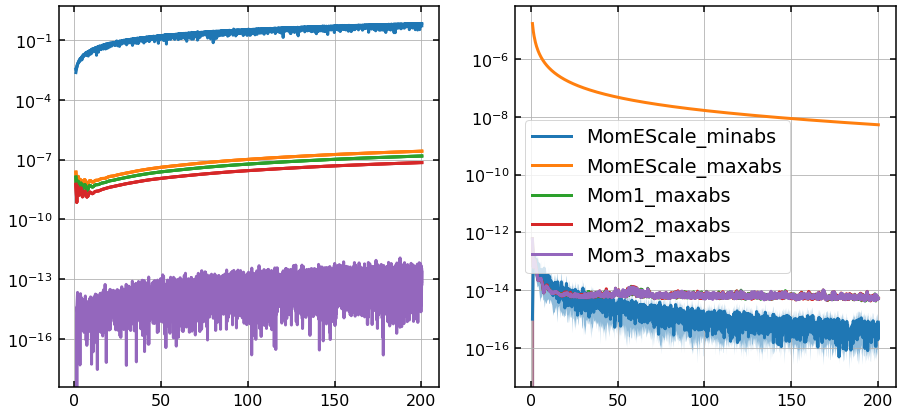

In [15]:
#A1e5
plt.figure(figsize=(15, 7))
f32 = pd.read_table(A1e5_N32['datapath']+'/constraints.csv', delimiter=',')
f64 = pd.read_table(A1e5_N64['datapath']+'/constraints.csv', delimiter=',')
f128 = pd.read_table(A1e5_N128['datapath']+'/constraints.csv', delimiter=',')

alphafac = 0.5
loc = 'maxabs'
an = Lin128.an_initial(f128['t'])

#plt.subplot(131)

#for n in range(3):
#    ns = str(n+1)
#    var1 = 'Mom'+ns+'_'+loc
#    var2 = 'MomEScale_'+loc
 ##   var128 = np.array(abs(f128[var1]))/np.array(abs(f128[var2]))
 #   err = get_error(np.array(abs(f32[var1]))/np.array(abs(f32[var2])), 
 #                   np.array(abs(f64[var1]))/np.array(abs(f64[var2])), var128)
 #   plt.semilogy(an, var128, label=var1+'/'+var2)
  ##  plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
#plt.legend()
#plt.grid()

plt.subplot(121)
for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'/MomEScale_av'
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    #plt.semilogy(an, var128, label=var)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'/MomEScale_maxabs'
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    plt.semilogy(an, var128, color='C0', label=var)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'/MomEScale_highQabs'
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    plt.semilogy(an, var128, color='C1', label=var)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'/MomEScale_medianabs'
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    plt.semilogy(an, var128, color='C2', label=var)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'/MomEScale_lowQabs'
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    plt.semilogy(an, var128, color='C3', label=var)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'/MomEScale_minabs'
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    plt.semilogy(an, var128, color='C4', label=var)
    #plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
#plt.legend()
plt.grid()

plt.subplot(122)
var = 'MomEScale_minabs'
var128 = np.array(abs(f128[var]))
err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
plt.semilogy(an, var128, label=var)
plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
var = 'MomEScale_'+loc
var128 = np.array(abs(f128[var]))
err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
plt.semilogy(an, var128, label=var)
plt.fill_between(an, var128-err, var128+err, alpha=alphafac)

for n in range(3):
    ns = str(n+1)
    var = 'Mom'+ns+'_'+loc
    var128 = np.array(abs(f128[var]))
    err = get_error(np.array(abs(f32[var])), np.array(abs(f64[var])), var128)
    plt.semilogy(an, var128, label=var)
    plt.fill_between(an, var128-err, var128+err, alpha=alphafac)
plt.legend()
plt.grid()

 read time file
 read time file


<ipython-input-3-c9e9d375df67>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))
<ipython-input-3-c9e9d375df67>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))


 read time file


<ipython-input-3-c9e9d375df67>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))
<ipython-input-3-c9e9d375df67>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))
<ipython-input-3-c9e9d375df67>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))


 read time file
 read time file
 read time file


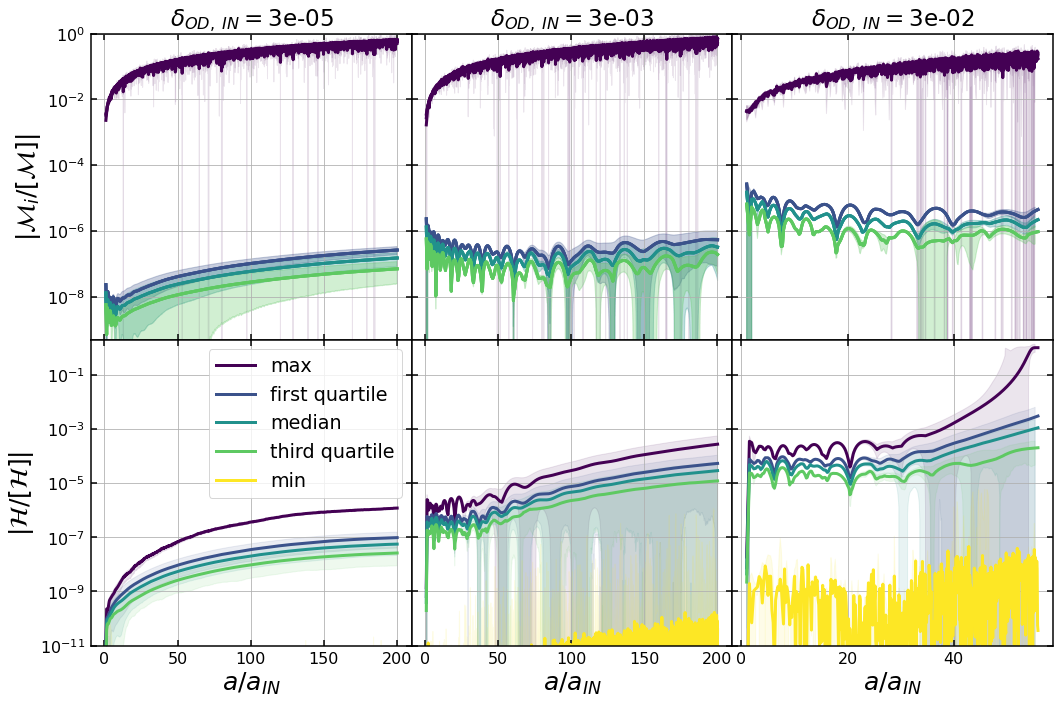

In [4]:
plt.figure(figsize=(15, 10))
labsize = 25
alphafac = 0.1
locs = ['maxabs', 'highQabs', 'medianabs', 'lowQabs', 'minabs']
loclabs = ['max', 'first quartile', 'median', 'third quartile', 'min']
cols = plt.cm.viridis(np.linspace(0,1,len(locs)))

j = 0
for sim32, sim64, sim128 in zip([A1e5_N32, A1e3_N32, d3e2_N32],[A1e5_N64, A1e3_N64, d3e2_N64], [A1e5_N128, A1e3_N128, d3e2_N128]):
    f32 = pd.read_table(sim32['datapath']+'/constraints.csv', delimiter=',')
    f64 = pd.read_table(sim64['datapath']+'/constraints.csv', delimiter=',')
    f128 = pd.read_table(sim128['datapath']+'/constraints.csv', delimiter=',')
    Lin128 = LinData.LinData_Class(sim128)
    an = Lin128.an_initial(f128['t'])
    ax = plt.subplot(230+j+1)
    for i, loc, in enumerate(locs):
        for n in range(3):
            var = 'Mom'+str(n+1)+'/MomEScale_'+loc
            var128 = np.array(f128[var])
            err = get_error(np.array(f32[var]), np.array(f64[var]), var128)
            plt.semilogy(an, var128, color=cols[i])
            plt.fill_between(an, var128-err, var128+err, color=cols[i], alpha=alphafac)
    plt.grid()
    ax.set_xticklabels([])
    plt.ylim(5e-10, 1)
    plt.title(r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin128.delta_initial('OD')))
    if j==0:
        plt.ylabel(r'$|\mathcal{M}_{i}/[\mathcal{M}]|$', fontsize=labsize)
    else:
        ax.set_yticklabels([])
    j += 1

j = 0
for sim32, sim64, sim128 in zip([A1e5_N32, A1e3_N32, d3e2_N32],[A1e5_N64, A1e3_N64, d3e2_N64], [A1e5_N128, A1e3_N128, d3e2_N128]):
    f32 = pd.read_table(sim32['datapath']+'/constraints.csv', delimiter=',')
    f64 = pd.read_table(sim64['datapath']+'/constraints.csv', delimiter=',')
    f128 = pd.read_table(sim128['datapath']+'/constraints.csv', delimiter=',')
    Lin128 = LinData.LinData_Class(sim128)
    an = Lin128.an_initial(f128['t'])
    ax = plt.subplot(230+j+4)
    for i, loc, in enumerate(locs):
        var = 'Ham/HamEScale_'+loc
        var128 = np.array(f128[var])
        err = get_error(np.array(f32[var]), np.array(f64[var]), var128)
        plt.semilogy(an, var128, color=cols[i], label=loclabs[i])
        plt.fill_between(an, var128-err, var128+err, color=cols[i], alpha=alphafac)
    plt.grid()
    plt.ylim(1e-11, 2)
    plt.xlabel(r'$a/a_{IN}$', fontsize=labsize)
    if j==0:
        plt.ylabel(r'$|\mathcal{H}/[\mathcal{H}]|$', fontsize=labsize)
        plt.legend()
    else:
        ax.set_yticklabels([])
    j += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.99, top=0.95, wspace=0, hspace=0)
plt.savefig('Plots/constraints.pdf')

 read time file


<ipython-input-10-02e64df537fe>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))
<ipython-input-10-02e64df537fe>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))
<ipython-input-10-02e64df537fe>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))


 read time file


<ipython-input-10-02e64df537fe>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))
<ipython-input-10-02e64df537fe>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))
<ipython-input-10-02e64df537fe>:19: RuntimeWarning: invalid value encountered in true_divide
  err = abs((f64-f128)/(c-1))


 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file


<ipython-input-11-a6d9339cf655>:192: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([32, 64, 100, 128], ['', '', '', ''])


 read time file
 read time file
 read time file
 read time file
 read time file


<ipython-input-11-a6d9339cf655>:259: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([32, 64, 100, 128], [32, 64, 100, 128])


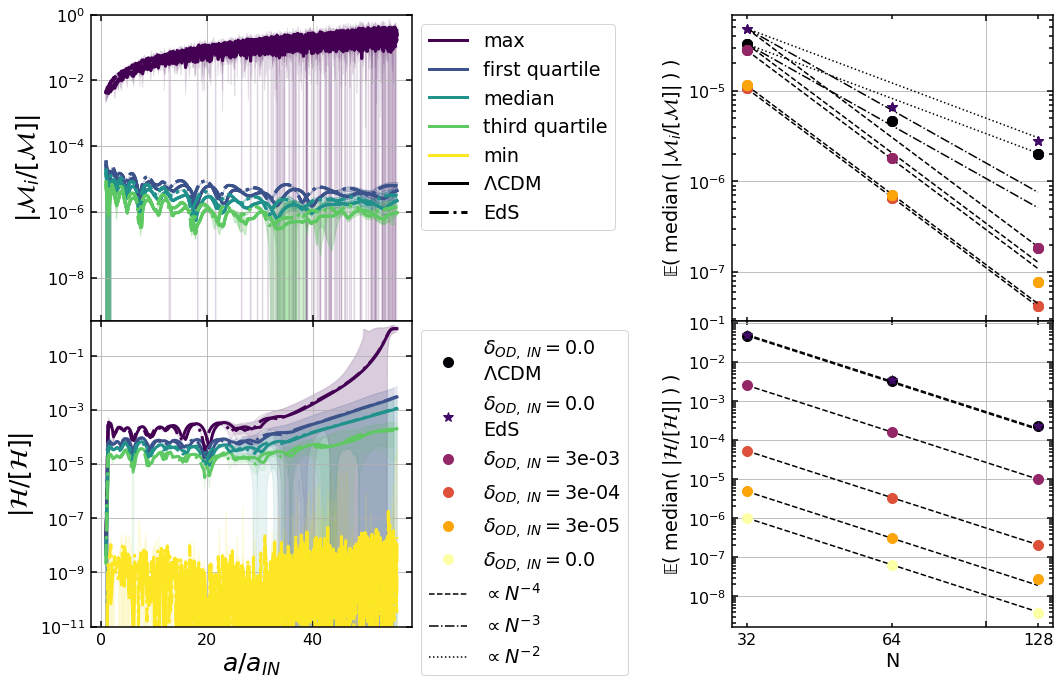

In [11]:
plt.figure(figsize=(15, 10))
labsize = 25
alphafac = 0.1
locs = ['maxabs', 'highQabs', 'medianabs', 'lowQabs', 'minabs']
loclabs = ['max', 'first quartile', 'median', 'third quartile', 'min']
cols = plt.cm.viridis(np.linspace(0,1,len(locs)))

convs = []

j = 0
ax = plt.subplot(231)
for sim32, sim64, sim128 in zip([d3e2_N32, d3e2_N32_EdS],
                                [d3e2_N64, d3e2_N64_EdS],
                                [d3e2_N128, d3e2_N128_EdS]):
    f32 = pd.read_table(sim32['datapath']+'/constraints.csv', delimiter=',')
    f64 = pd.read_table(sim64['datapath']+'/constraints.csv', delimiter=',')
    f128 = pd.read_table(sim128['datapath']+'/constraints.csv', delimiter=',')
    Lin128 = LinData.LinData_Class(sim128)
    an = Lin128.an_initial(f128['t'])
    
    for i, loc, in enumerate(locs):
        for n in range(3):
            var = 'Mom'+str(n+1)+'/MomEScale_'+loc
            var128 = np.array(f128[var])
            err = get_error(np.array(f32[var]), np.array(f64[var]), var128)
            convs += [sim128['simname'], loc, get_conv(np.array(f32[var]), np.array(f64[var]), var128)]
            if j==0:
                if n==0:
                    ax.semilogy(an, var128, color=cols[i], linestyle='-', label=loclabs[i])
                else:
                    ax.semilogy(an, var128, color=cols[i], linestyle='-')
            else:
                ax.semilogy(an, var128, color=cols[i], linestyle='-.')
            #ax.semilogy(an, var128, color=cols[i], linestyle=ls)
            ax.fill_between(an, var128-err, var128+err, color=cols[i], alpha=alphafac)
    j+=1
ax.semilogy(an, [0]*len(an), color='k', linestyle='-', label=r'$\Lambda$CDM')
ax.semilogy(an, [0]*len(an), color='k', linestyle='-.', label='EdS')
ax.grid()
ax.legend(bbox_to_anchor=(1,1))
ax.set_xticklabels([])
ax.set_ylim(5e-10, 1)
#ax.title(r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin128.delta_initial('OD')))
ax.set_ylabel(r'$|\mathcal{M}_{i}/[\mathcal{M}]|$', fontsize=labsize)


j = 0
ax = plt.subplot(234)
for sim32, sim64, sim128 in zip([d3e2_N32, d3e2_N32_EdS],
                                [d3e2_N64, d3e2_N64_EdS],
                                [d3e2_N128, d3e2_N128_EdS]):
    f32 = pd.read_table(sim32['datapath']+'/constraints.csv', delimiter=',')
    f64 = pd.read_table(sim64['datapath']+'/constraints.csv', delimiter=',')
    f128 = pd.read_table(sim128['datapath']+'/constraints.csv', delimiter=',')
    Lin128 = LinData.LinData_Class(sim128)
    an = Lin128.an_initial(f128['t'])
    
    for i, loc, in enumerate(locs):
        var = 'Ham/HamEScale_'+loc
        var128 = np.array(f128[var])
        err = get_error(np.array(f32[var]), np.array(f64[var]), var128)
        if j==0:
            ax.semilogy(an, var128, color=cols[i], linestyle='-')
        else:
            ax.semilogy(an, var128, color=cols[i], linestyle='-.')
        ax.fill_between(an, var128-err, var128+err, color=cols[i], alpha=alphafac)
    j += 1
    
cols = plt.cm.inferno(np.linspace(0,1,6))
ms = 10
for i, sim in enumerate([d3e2_N128, d3e2_N128_EdS, A1e3_N128, A1e4_N128, A1e5_N128, A0_N128]):
    Lin = LinData.LinData_Class(sim)
    if i==0:
        m = 'o'
        lab = r'$\delta_{OD,\;IN} = $'+'{:.1f}'.format(Lin.delta_initial('OD'))+'\n'+r'$\Lambda$CDM'
    elif i==1:
        m = '*'
        lab = r'$\delta_{OD,\;IN} = $'+'{:.1f}'.format(Lin.delta_initial('OD'))+'\n'+'EdS'
    elif i == 5:
        lab = r'$\delta_{OD,\;IN} = $'+'{:.1f}'.format(0.0)
        m = 'o'
    else:
        lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))
        m = 'o'
    ax.semilogy([1, 2, 3], [0]*3, marker=m, markersize=ms, color=cols[i], linewidth=0, label=lab)
ax.semilogy([1, 2, 3], [0.0]*3, 'k--', linewidth=1.5, label=r'$\propto N^{-4}$')
ax.semilogy([1, 2, 3], [0.0]*3, 'k-.', linewidth=1.5, label=r'$\propto N^{-3}$')
ax.semilogy([1, 2, 3], [0.0]*3, 'k:', linewidth=1.5, label=r'$\propto N^{-2}$')

ax.grid()
ax.set_ylim(1e-11, 2)
ax.set_xlabel(r'$a/a_{IN}$', fontsize=labsize)
ax.set_ylabel(r'$|\mathcal{H}/[\mathcal{H}]|$', fontsize=labsize)
ax.legend(bbox_to_anchor=(1,1))
    



#cols = plt.cm.inferno(np.linspace(0,1,5))
#fig = plt.figure()
ax = plt.subplot(233)
N = np.array([32.0, 64.0, 128.0])

for n in range(3):
    var = []
    for sim in [d3e2_N32, d3e2_N64, d3e2_N128]:
        f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
        var += [np.nanmean(np.array(f['Mom'+str(n+1)+'/MomEScale_medianabs']))]
    if n==2:
        ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
        ax.loglog(N, N**(-3)*var[0]/(N[0]**(-3)), 'k-.', linewidth=1.5)
        ax.loglog(N, N**(-2)*var[0]/(N[0]**(-2)), 'k:', linewidth=1.5)
        Lin = LinData.LinData_Class(sim)
        lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))+'\n'+r'$\Lambda$CDM'
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[0], linewidth=0, label=lab)
    else:
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[0], linewidth=0)

for n in range(3):
    var = []
    for sim in [d3e2_N32_EdS, d3e2_N64_EdS, d3e2_N128_EdS]:
        f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
        var += [np.nanmean(np.array(f['Mom'+str(n+1)+'/MomEScale_medianabs']))]
    if n==2:
        ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
        ax.loglog(N, N**(-3)*var[0]/(N[0]**(-3)), 'k-.', linewidth=1.5)
        ax.loglog(N, N**(-2)*var[0]/(N[0]**(-2)), 'k:', linewidth=1.5)
        Lin = LinData.LinData_Class(sim)
        lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))+'\n'+'EdS'
        ax.loglog(N, var, marker='*', markersize=ms, color=cols[1], linewidth=0, label=lab)
    else:
        ax.loglog(N, var, marker='*', markersize=ms, color=cols[1], linewidth=0)

for n in range(3):
    var = []
    for sim in [A1e3_N32, A1e3_N64, A1e3_N128]:
        f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
        var += [np.nanmean(np.array(f['Mom'+str(n+1)+'/MomEScale_medianabs']))]
    if n==2:
        ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
        Lin = LinData.LinData_Class(sim)
        lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[2], linewidth=0, label=lab)
    else:
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[2], linewidth=0)

for n in range(3):
    var = []
    for sim in [A1e4_N32, A1e4_N64, A1e4_N128]:
        f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
        var += [np.nanmean(np.array(f['Mom'+str(n+1)+'/MomEScale_medianabs']))]
    if n==2:
        ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
        Lin = LinData.LinData_Class(sim)
        lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[3], linewidth=0, label=lab)
    else:
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[3], linewidth=0)

for n in range(3):
    var = []
    for sim in [A1e5_N32, A1e5_N64, A1e5_N128]:
        f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
        var += [np.nanmean(np.array(f['Mom'+str(n+1)+'/MomEScale_medianabs']))]
    if n==2:
        ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
        Lin = LinData.LinData_Class(sim)
        lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[4], linewidth=0, label=lab)
    else:
        ax.loglog(N, var, marker='o', markersize=ms, color=cols[4], linewidth=0)

for n in range(3):
    var = []
    for sim in [A0_N32, A0_N64, A0_N128]:
        f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
        var += [np.nanmean(np.array(f['Mom'+str(n+1)+'/MomEScale_medianabs']))]
    if n==2:
        #ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
        Lin = LinData.LinData_Class(sim)
        lab = r'$\delta_{OD,\;IN} = $'+'{:.1f}'.format(0.0)
        #ax.loglog(N, var, marker='o', color=cols[5], linewidth=0, label=lab)
    #else:
        #ax.loglog(N, var, marker='o', color=cols[5], linewidth=0)

ax.loglog(N, [0.0]*3, 'k--', linewidth=1.5, label=r'$\propto N^{-4}$')
ax.grid()
ylab = r'$\mathrm{\mathbb{E}}(\;$'+'median'+r'$(\;|\mathcal{M}_i/[\mathcal{M}]|\;)\;)$'
ax.set_ylabel(ylab)
ax.set_xlabel('N')
ax.set_xticklabels([])
ax.set_xticks([32, 64, 100, 128], ['', '', '', ''])
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
#plt.legend()



ax = plt.subplot(236)
var = []
for sim in [d3e2_N32, d3e2_N64, d3e2_N128]:
    f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
    var += [np.nanmean(np.array(f['Ham/HamEScale_medianabs']))]
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
Lin = LinData.LinData_Class(sim)
lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))+'\n'+r'$\Lambda$CDM'
ax.loglog(N, var, marker='o', markersize=ms, color=cols[0], linewidth=0, label=lab)

var = []
for sim in [d3e2_N32_EdS, d3e2_N64_EdS, d3e2_N128_EdS]:
    f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
    var += [np.nanmean(np.array(f['Ham/HamEScale_medianabs']))]
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
Lin = LinData.LinData_Class(sim)
lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))+'\n'+'EdS'
ax.loglog(N, var, marker='*', markersize=ms, color=cols[1], linewidth=0, label=lab)


var = []
for sim in [A1e3_N32, A1e3_N64, A1e3_N128]:
    f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
    var += [np.nanmean(np.array(f['Ham/HamEScale_medianabs']))]
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
Lin = LinData.LinData_Class(sim)
lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))
ax.loglog(N, var, marker='o', markersize=ms, color=cols[2], linewidth=0, label=lab)

var = []
for sim in [A1e4_N32, A1e4_N64, A1e4_N128]:
    f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
    var += [np.nanmean(np.array(f['Ham/HamEScale_medianabs']))]
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
Lin = LinData.LinData_Class(sim)
lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))
ax.loglog(N, var, marker='o', markersize=ms, color=cols[3], linewidth=0, label=lab)

var = []
for sim in [A1e5_N32, A1e5_N64, A1e5_N128]:
    f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
    var += [np.nanmean(np.array(f['Ham/HamEScale_medianabs']))]
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
Lin = LinData.LinData_Class(sim)
lab = r'$\delta_{OD,\;IN} = $'+'{:.0e}'.format(Lin.delta_initial('OD'))
ax.loglog(N, var, marker='o', markersize=ms, color=cols[4], linewidth=0, label=lab)

var = []
for sim in [A0_N32, A0_N64, A0_N128]:
    f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
    var += [np.nanmean(np.array(f['Ham/HamEScale_medianabs']))]
ax.loglog(N, N**(-4)*var[0]/(N[0]**(-4)), 'k--', linewidth=1.5)
Lin = LinData.LinData_Class(sim)
lab = r'$\delta_{OD,\;IN} = $'+'{:.1f}'.format(0.0)
ax.loglog(N, var, marker='o', markersize=ms, color=cols[5], linewidth=0, label=lab)

ax.grid()
ylab = r'$\mathrm{\mathbb{E}}(\;$'+'median'+r'$(\;|\mathcal{H}/[\mathcal{H}]|\;)\;)$'
ax.set_ylabel(ylab)
ax.set_xlabel('N')
ax.set_xticklabels([])
ax.set_xticks([32, 64, 100, 128], [32, 64, 100, 128])
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
#ax.set_ylim(1e-9, 2e-1)
#ax.set_yticklabels([])
#ax.set_yticks([1e-2, 1e-4, 1e-6, 1e-8], [1e-2, 1e-4, 1e-6, 1e-8])
#ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
#ax.legend(bbox_to_anchor=(-0.3,1))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.99, top=0.95, wspace=0, hspace=0)
#plt.savefig('Plots/Constraint_conv.pdf', bbox_inches = 'tight')

In [16]:
#convs

#LCDM
cs = [13.75993804030438, 13.75992703893071, 13.759928995106154]
print(np.mean(cs), np.log(np.mean(cs))/np.log(2))

#EdS
cs = [15.470218608760586, 15.470602367804787, 15.470135577753721]
print(np.mean(cs), np.log(np.mean(cs))/np.log(2))

13.759931358113747 3.7824013680119735
15.470318851439698 3.9514310266872603


In [15]:
2**4

16